<a href="https://colab.research.google.com/github/vasavithimirishetty13/AIML-2025/blob/main/labbbb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
file_path = ("/content/sample_data/fetal_health.csv")
data = pd.read_csv(file_path)

In [ ]:
print(data.info())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   int64  
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   int64  
 8   mean_value_of_short_term_variability  

<ipython-input-5-dd99236d9887>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['fetal_health'], palette="viridis")


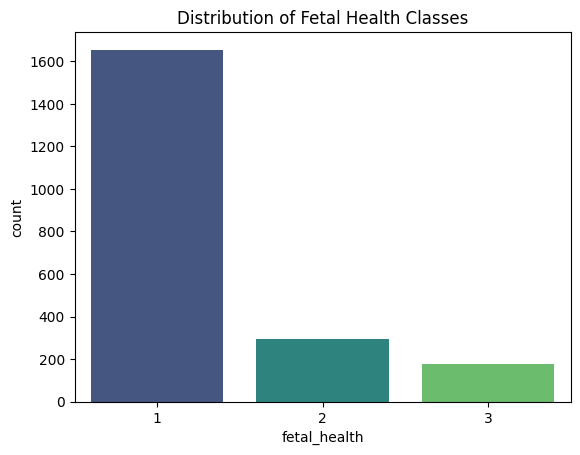

In [ ]:
sns.countplot(x=data['fetal_health'], palette="viridis")
plt.title("Distribution of Fetal Health Classes")
plt.show()

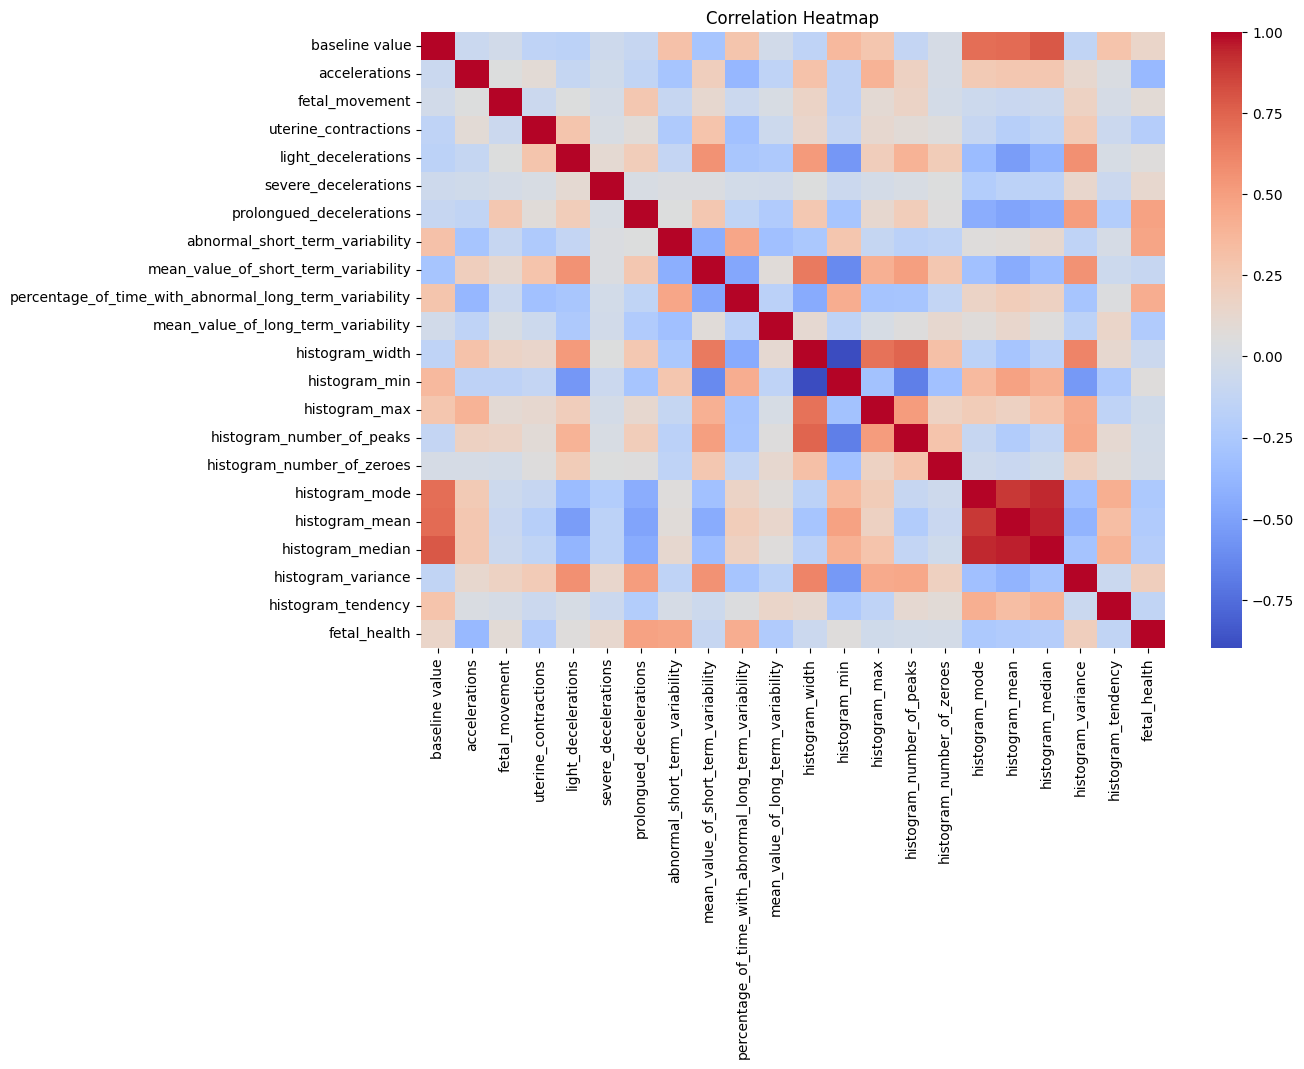

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
correlation_matrix = data.corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                                                     baseline value  \
baseline value                                            1.000000   
accelerations                                            -0.080560   
fetal_movement                                           -0.033436   
uterine_contractions                                     -0.146373   
light_decelerations                                      -0.159032   
severe_decelerations                                     -0.053518   
prolongued_decelerations                                 -0.104597   
abnormal_short_term_variability                           0.305570   
mean_value_of_short_term_variability                     -0.279607   
percentage_of_time_with_abnormal_long_term_vari...        0.285630   
mean_value_of_long_term_variability                      -0.032091   
histogram_width                                          -0.147679   
histogram_min                                             0.361619   

In [ ]:
X = data.drop(columns=["fetal_health"])
y = data["fetal_health"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
svc_linear = SVC(kernel="linear", random_state=42)
svc_linear.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
svc_rbf = SVC(kernel="rbf", random_state=42)
svc_rbf.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    print(f"Evaluation for {model_name} Model")
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
    print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_test_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

In [ ]:
evaluate_model(svc_linear, X_train, X_test, y_train, y_test, "Linear Kernel SVM")

Evaluation for Linear Kernel SVM Model
Training Accuracy: 0.9111764705882353
Testing Accuracy: 0.892018779342723

Classification Report:
               precision    recall  f1-score   support

           1       0.95      0.95      0.95       332
           2       0.62      0.69      0.66        59
           3       0.89      0.69      0.77        35

    accuracy                           0.89       426
   macro avg       0.82      0.78      0.79       426
weighted avg       0.90      0.89      0.89       426


Confusion Matrix:
 [[315  16   1]
 [ 16  41   2]
 [  2   9  24]]


In [ ]:
evaluate_model(svc_rbf, X_train, X_test, y_train, y_test, "RBF Kernel SVM")

Evaluation for RBF Kernel SVM Model
Training Accuracy: 0.9358823529411765
Testing Accuracy: 0.8943661971830986

Classification Report:
               precision    recall  f1-score   support

           1       0.93      0.97      0.95       332
           2       0.67      0.58      0.62        59
           3       0.86      0.71      0.78        35

    accuracy                           0.89       426
   macro avg       0.82      0.75      0.78       426
weighted avg       0.89      0.89      0.89       426


Confusion Matrix:
 [[322   8   2]
 [ 23  34   2]
 [  1   9  25]]
